
# Máxima Verossimilhança (MLE) 



## Sumário
1. [Probabilidade vs. Verossimilhança](#sec1)
2. [Definição de MLE e Log-Verossimilhança](#sec2)  
3. [Score, Hessiana e Condições de Otimalidade](#sec3)  
4. [Exemplo 1 — Bernoulli(p): derivação *completa*](#sec4)  
5. [Exemplo 2 — Poisson(λ): derivação *completa*](#sec5)  
6. [Exemplo 3 — Exponencial(λ): derivação *completa*](#sec6)  
7. [Exemplo 4 — Normal(μ, σ²): derivação *completa*](#sec7)  
8. [Regressão Logística como MLE: gradiente, Hessiana, Newton/IRLS](#sec8)  
9. [Informação de Fisher e IC assintóticos](#sec9)  
10. [Armadilhas comuns e observações práticas](#sec10)  
11. [Exercícios e extensões](#sec11)


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, suppress=True)
rng = np.random.default_rng(42)

# Utilitários simples
def add_intercept(X):
    X = np.asarray(X)
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    return np.hstack([np.ones((X.shape[0], 1)), X])

def standardize(X):
    X = np.asarray(X, dtype=float)
    mu = X.mean(axis=0, keepdims=True)
    sd = X.std(axis=0, ddof=0, keepdims=True)
    sd[sd == 0] = 1.0
    return (X - mu) / sd, mu.squeeze(), sd.squeeze()



<a id="sec1"></a>
## 1) Probabilidade vs. Verossimilhança (conceitos fundamentais)

- **Probabilidade**: com o **parâmetro fixo** (p.ex., θ conhecido), perguntamos qual a probabilidade de observar certos dados **X**. Ex.: `P(X=x | θ)`.

- **Verossimilhança**: com os **dados fixos** (já observados), olhamos a função de θ que mede "quão plausível" é cada valor de θ **dado** o que observamos.  
  Definimos a **função de verossimilhança** como  
  $$ L(\theta; x) = f(x \mid \theta), $$  
  onde $f$ é a função de probabilidade (discreta) ou densidade (contínua), vista **como função de θ**.

- Por conveniência analítica, usamos a **log-verossimilhança**  
  $$ \ell(\theta) = \log L(\theta) $$  
  porque soma logaritmos (mais estável numericamente e mais fácil para derivar).



<a id="sec2"></a>
## 2) Definição formal de MLE e Log-Verossimilhança

Seja $x = (x_1,\dots,x_n)$ uma amostra i.i.d. de uma distribuição parametrizada por $\theta \in \Theta$. A **verossimilhança** é
$$
L(\theta; x) = \prod_{i=1}^n f(x_i \mid \theta).
$$
A **log-verossimilhança** é
$$
\ell(\theta) = \log L(\theta) = \sum_{i=1}^n \log f(x_i \mid \theta).
$$

A **estimativa de máxima verossimilhança (MLE)** é qualquer ponto
$$
\hat{\theta} \in \arg\max_{\theta \in \Theta} \ell(\theta).
$$

Quando existe solução **no interior** de $\Theta$ e $\ell$ é diferenciável, a condição necessária é que o **score** (gradiente da log-verossimilhança) seja zero em $\hat{\theta}$:
$$
\nabla_\theta \ell(\hat{\theta}) = 0.
$$
Se a **Hessiana** $\nabla^2_\theta \ell(\hat{\theta})$ é **negativa definida**, então $\hat{\theta}$ é máximo local. Em problemas unidimensionais, isso reduz a
$$
\ell'(\hat{\theta}) = 0 \quad \text{e} \quad \ell''(\hat{\theta}) < 0.
$$



<a id="sec3"></a>
## 3) Score, Hessiana e Condições de Otimalidade (passo a passo)

- **Score**: $\;U(\theta) = \nabla_\theta \ell(\theta)$.
- **Hessiana**: $\;H(\theta) = \nabla^2_\theta \ell(\theta)$.

Em 1D: $U(\theta)=\dfrac{d}{d\theta}\ell(\theta)$ e $H(\theta)=\dfrac{d^2}{d\theta^2}\ell(\theta)$.

**Condição de primeira ordem** (necessária em pontos internos): $U(\hat{\theta})=0$.  
**Condição de segunda ordem** (suficiente para máximo local): $H(\hat{\theta})$ negativa definida (em 1D, $\ell''(\hat{\theta})<0$).

> Observação: se a solução ótima estiver **na fronteira** do espaço paramétrico (ex.: $p=0$ ou $p=1$ em Bernoulli), o score pode não anular; comparamos valores da log-verossimilhança nos candidatos da fronteira.



<a id="sec4"></a>
## 4) Exemplo 1 — Bernoulli(p): derivação **linha a linha**

Dados $y_1,\dots,y_n \in \{0,1\}$ i.i.d. de $ \text{Bernoulli}(p) $. A massa de probabilidade é
$$
P(Y=y \mid p) = p^y(1-p)^{1-y}, \quad 0<p<1.
$$
Logo, a verossimilhança é
$$
L(p; y_1,\dots,y_n) = \prod_{i=1}^n p^{y_i}(1-p)^{1-y_i} = p^{\sum y_i} (1-p)^{n - \sum y_i}.
$$
Defina $k=\sum_{i=1}^n y_i$. A **log-verossimilhança** é
$$
\ell(p) = k \log p + (n-k)\log(1-p).
$$

**Derivada primeira** (score):
$$
\frac{d}{dp}\ell(p) = \frac{k}{p} - \frac{n-k}{1-p}.
$$
Igualando a zero:
$$
\frac{k}{p} = \frac{n-k}{1-p} \;\Rightarrow\; k(1-p) = (n-k)p \;\Rightarrow\; k - kp = np - kp \;\Rightarrow\; k = np.
$$
Portanto,
$$
\hat{p} = \frac{k}{n} = \frac{1}{n}\sum_{i=1}^n y_i.
$$

**Derivada segunda**:
$$
\frac{d^2}{dp^2}\ell(p) = -\frac{k}{p^2} - \frac{n-k}{(1-p)^2} < 0 \quad \text{em } 0<p<1.
$$
Logo, $\hat{p}=k/n$ é máximo.  
**Informação de Fisher**: $I(p) = -\mathbb{E}\left[\ell''(p)\right] = \frac{n}{p(1-p)}$.  
A variância assintótica: $\mathrm{Var}(\hat p) \approx \dfrac{p(1-p)}{n}$.


n=50, p_true=0.300, k=18, p_hat_MLE=0.360


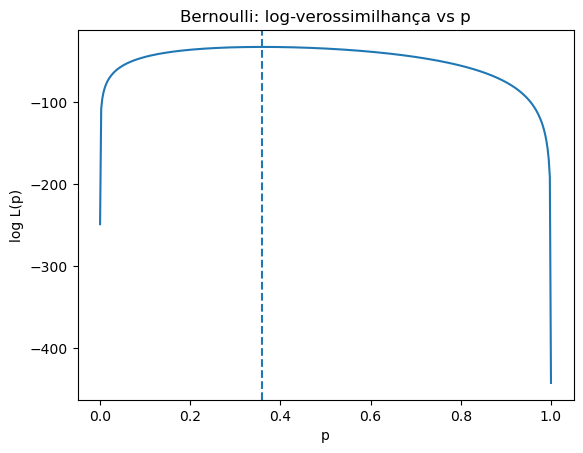

In [2]:

# Bernoulli: simulação, MLE fechado e forma da log-verossimilhança
n = 50
p_true = 0.3
y = rng.binomial(1, p_true, size=n)
k = y.sum()
p_hat = k / n

print(f"n={n}, p_true={p_true:.3f}, k={k}, p_hat_MLE={p_hat:.3f}")

# Curva de log-verossimilhança
ps = np.linspace(1e-6, 1-1e-6, 400)
loglike = k*np.log(ps) + (n-k)*np.log(1-ps)

plt.figure()
plt.plot(ps, loglike)
plt.axvline(p_hat, linestyle='--')
plt.title("Bernoulli: log-verossimilhança vs p")
plt.xlabel("p")
plt.ylabel("log L(p)")
plt.show()



<a id="sec5"></a>
## 5) Exemplo 2 — Poisson(λ): derivação **passo a passo**

Dados $x_1,\dots,x_n \in \{0,1,2,\dots\}$ i.i.d. de $ \text{Poisson}(\lambda) $. A massa de probabilidade é
$$
P(X=x \mid \lambda) = e^{-\lambda}\frac{\lambda^x}{x!}, \quad \lambda>0.
$$
Logo,
$$
L(\lambda; x) = \prod_{i=1}^n e^{-\lambda}\frac{\lambda^{x_i}}{x_i!}
= e^{-n\lambda} \frac{\lambda^{\sum x_i}}{\prod x_i!}.
$$
A **log-verossimilhança** (ignorando a constante $-\sum \log x_i!$) é
$$
\ell(\lambda) = -n\lambda + \Big(\sum_{i=1}^n x_i\Big)\log \lambda + \text{const}.
$$
**Derivada**:
$$
\frac{d}{d\lambda}\ell(\lambda) = -n + \frac{\sum x_i}{\lambda}.
$$
Igualando a zero:
$$
-n + \frac{\sum x_i}{\lambda} = 0 \;\Rightarrow\; \lambda = \frac{1}{n}\sum x_i = \bar{x}.
$$
**Derivada segunda**: $\ell''(\lambda) = -\dfrac{\sum x_i}{\lambda^2} < 0$ no ponto $\lambda=\bar{x}$.  
Portanto, $\hat{\lambda}=\bar{x}$.


n=80, lambda_true=2.500, lambda_hat_MLE=2.288


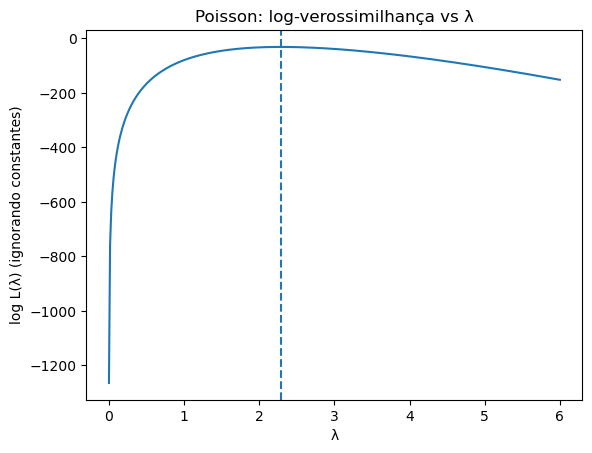

In [3]:

# Poisson: simulação, MLE fechado e curva de log-verossimilhança
n = 80
lam_true = 2.5
x = rng.poisson(lam_true, size=n)
lam_hat = x.mean()

print(f"n={n}, lambda_true={lam_true:.3f}, lambda_hat_MLE={lam_hat:.3f}")

lams = np.linspace(1e-3, 6, 400)
loglike = -(n*lams) + x.sum()*np.log(lams)

plt.figure()
plt.plot(lams, loglike)
plt.axvline(lam_hat, linestyle='--')
plt.title("Poisson: log-verossimilhança vs λ")
plt.xlabel("λ")
plt.ylabel("log L(λ) (ignorando constantes)")
plt.show()



<a id="sec6"></a>
## 6) Exemplo 3 — Exponencial(λ): derivação **passo a passo**

Dados $x_1,\dots,x_n>0$ i.i.d. de $ \text{Exponencial}(\lambda) $ (taxa $\lambda$). A densidade é
$$
f(x \mid \lambda) = \lambda e^{-\lambda x}, \quad \lambda>0.
$$
Logo,
$$
L(\lambda; x) = \prod_{i=1}^n \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda \sum x_i}.
$$
A **log-verossimilhança** é
$$
\ell(\lambda) = n\log \lambda - \lambda \sum_{i=1}^n x_i.
$$
**Derivada**:
$$
\frac{d}{d\lambda}\ell(\lambda) = \frac{n}{\lambda} - \sum x_i.
$$
Zerando:
$$
\frac{n}{\lambda} - \sum x_i = 0 \;\Rightarrow\; \hat{\lambda} = \frac{n}{\sum x_i} = \frac{1}{\bar{x}}.
$$
**Derivada segunda**: $\ell''(\lambda) = -\dfrac{n}{\lambda^2} < 0$.  
Portanto, $\hat{\lambda}=1/\bar{x}$.


n=100, lambda_true=1.800, lambda_hat_MLE=1.637, mean(x)=0.611


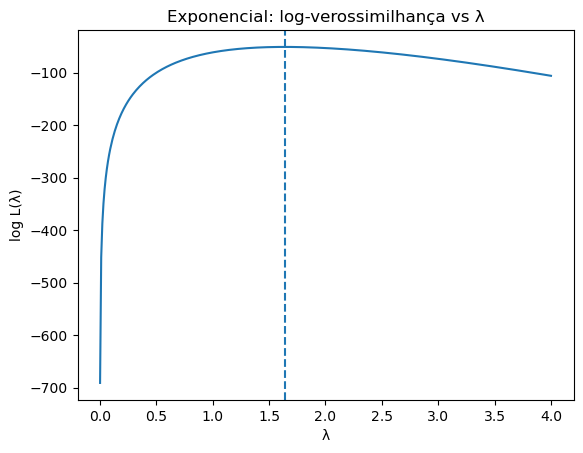

In [4]:

# Exponencial: simulação, MLE fechado e curva de log-verossimilhança
n = 100
lam_true = 1.8
x = rng.exponential(1/lam_true, size=n)  # scale = 1/lambda
lam_hat = n / x.sum()

print(f"n={n}, lambda_true={lam_true:.3f}, lambda_hat_MLE={lam_hat:.3f}, mean(x)={x.mean():.3f}")

lams = np.linspace(1e-3, 4, 400)
loglike = n*np.log(lams) - lams * x.sum()

plt.figure()
plt.plot(lams, loglike)
plt.axvline(lam_hat, linestyle='--')
plt.title("Exponencial: log-verossimilhança vs λ")
plt.xlabel("λ")
plt.ylabel("log L(λ)")
plt.show()



<a id="sec7"></a>
## 7) Exemplo 4 — Normal(μ, σ²): derivação **sem pular etapas**

Considere $x_1,\dots,x_n$ i.i.d. de $ \mathcal{N}(\mu, \sigma^2) $. A densidade é
$$
f(x \mid \mu,\sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\!\Big(-\frac{(x-\mu)^2}{2\sigma^2}\Big).
$$
A log-verossimilhança (somando os logaritmos) é
$$
\ell(\mu,\sigma^2) = -\frac{n}{2}\log(2\pi) - \frac{n}{2}\log(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - \mu)^2.
$$

**Passo 1 — derivar em relação a $\mu$:**
$$
\frac{\partial}{\partial \mu}\ell(\mu,\sigma^2)
= -\frac{1}{2\sigma^2}\cdot 2 \sum_{i=1}^n (x_i - \mu)(-1)
= \frac{1}{\sigma^2}\sum_{i=1}^n (x_i - \mu).
$$
Igualando a zero:
$$
\sum_{i=1}^n (x_i - \mu) = 0 \;\Rightarrow\; n\bar{x} - n\mu = 0 \;\Rightarrow\; \hat{\mu} = \bar{x}.
$$

**Passo 2 — derivar em relação a $\sigma^2$:**
$$
\frac{\partial}{\partial \sigma^2}\ell(\mu,\sigma^2)
= -\frac{n}{2}\cdot\frac{1}{\sigma^2} + \frac{1}{2}\cdot \frac{1}{(\sigma^2)^2}\sum_{i=1}^n (x_i - \mu)^2.
$$
Zerando e substituindo $\hat{\mu}=\bar{x}$:
$$
-\frac{n}{2}\cdot\frac{1}{\sigma^2} + \frac{1}{2}\cdot \frac{1}{(\sigma^2)^2}\sum (x_i - \bar{x})^2 = 0.
$$
Multiplicando por $2(\sigma^2)^2$:
$$
-n\sigma^2 + \sum (x_i - \bar{x})^2 = 0 \;\Rightarrow\; \hat{\sigma}^2 = \frac{1}{n}\sum (x_i - \bar{x})^2.
$$

**Conclusões:**
$$
\boxed{\hat{\mu} = \bar{x}}, \qquad \boxed{\hat{\sigma}^2 = \frac{1}{n}\sum (x_i - \bar{x})^2}.
$$
Observe que $\hat{\sigma}^2$ (MLE) usa $1/n$, não $1/(n-1)$ (este último é o estimador **não-viesado** de $\sigma^2$).


n=120, mu_true=2.000, sigma_true^2=2.250
mu_hat_MLE=1.948, sigma2_hat_MLE=2.391  (unbiased s2=2.411)


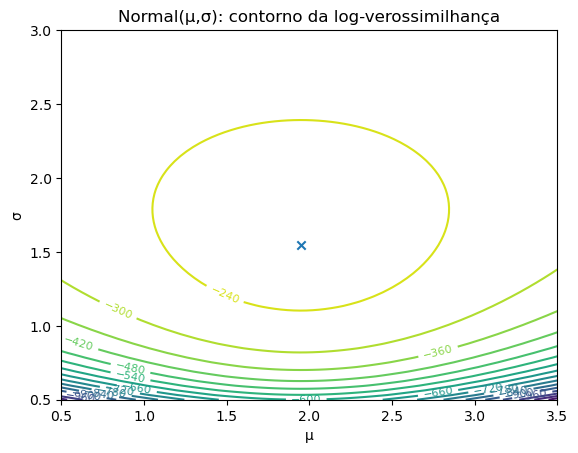

In [5]:

# Normal: simulação, MLEs analíticos e visualização (contorno da log-verossimilhança)
n = 120
mu_true = 2.0
sigma_true = 1.5
x = rng.normal(mu_true, sigma_true, size=n)

mu_hat = x.mean()
sigma2_hat = np.mean((x - mu_hat)**2)

print(f"n={n}, mu_true={mu_true:.3f}, sigma_true^2={sigma_true**2:.3f}")
print(f"mu_hat_MLE={mu_hat:.3f}, sigma2_hat_MLE={sigma2_hat:.3f}  (unbiased s2={(x.var(ddof=1)):.3f})")

# Contorno da log-verossimilhança em (mu, sigma)
mus = np.linspace(mu_true-1.5, mu_true+1.5, 80)
sigmas = np.linspace(0.5, 3.0, 80)
MU, SIG = np.meshgrid(mus, sigmas)
LL = -(n/2)*np.log(2*np.pi) - (n/2)*np.log(SIG**2) - (1/(2*SIG**2))*np.sum((x.reshape(-1,1,1)-MU)**2, axis=0)

plt.figure()
cs = plt.contour(MU, SIG, LL, levels=15)
plt.clabel(cs, inline=True, fontsize=8)
plt.scatter([mu_hat], [np.sqrt(sigma2_hat)], marker='x')
plt.title("Normal(μ,σ): contorno da log-verossimilhança")
plt.xlabel("μ")
plt.ylabel("σ")
plt.show()



<a id="sec8"></a>
## 8) Regressão Logística como MLE — **derivação completa**

Dados pares $(x_i, y_i)$, com $y_i \in \{0,1\}$ e $x_i \in \mathbb{R}^p$. Defina $X\in\mathbb{R}^{n\times(p+1)}$ com intercepto (primeira coluna de 1s) e vetor de parâmetros $\beta\in\mathbb{R}^{p+1}$.  
O modelo assume
$$
P(Y_i=1 \mid x_i) = \sigma(\eta_i), \quad \eta_i = x_i^\top\beta, \quad \sigma(t)=\frac{1}{1+e^{-t}}.
$$
Logo,
$$
P(Y_i=y_i \mid x_i,\beta) = \sigma(\eta_i)^{y_i}\,[1-\sigma(\eta_i)]^{1-y_i}.
$$
A **log-verossimilhança** é
$$
\ell(\beta) = \sum_{i=1}^n \Big[ y_i\log\sigma(\eta_i) + (1-y_i)\log(1-\sigma(\eta_i)) \Big].
$$

### Score (gradiente): passo a passo
Primeiro, note que $\sigma'(t)=\sigma(t)[1-\sigma(t)]$. Denote $p_i=\sigma(\eta_i)$. Então
$$
\frac{\partial}{\partial \beta}\ell(\beta) = \sum_{i=1}^n \Big[\frac{y_i}{p_i} - \frac{1-y_i}{1-p_i}\Big] \cdot \frac{\partial p_i}{\partial \beta}.
$$
E
$$
\frac{\partial p_i}{\partial \beta} = \sigma'(\eta_i)\,\frac{\partial \eta_i}{\partial \beta}
= p_i(1-p_i) \, x_i.
$$
Substituindo:
$$
\nabla_\beta \ell(\beta) = \sum_{i=1}^n \Big[y_i - p_i\Big] x_i = X^\top (y - p),
$$
onde $p=(p_1,\dots,p_n)^\top$.

### Hessiana: passo a passo
$$
\nabla^2_\beta \ell(\beta) = - \sum_{i=1}^n p_i(1-p_i) x_i x_i^\top = - X^\top W X,
$$
com $W=\mathrm{diag}(p_i(1-p_i))$ (matriz diagonal). Note que $X^\top W X$ é s.p.d. se $X$ tiver posto completo e $0<p_i<1$. Logo $\ell(\beta)$ é **côncava** (Hessiana negativa semidefinida).

### Newton-Raphson / IRLS
O passo de Newton para maximizar $\ell$ é
$$
\beta_{\text{novo}} = \beta - [\nabla^2 \ell(\beta)]^{-1}\, \nabla \ell(\beta)
= \beta + (X^\top W X)^{-1} X^\top (y - p).
$$
Este é o método **IRLS** (Iteratively Reweighted Least Squares).  
Com **regularização L2** (penalidade $\lambda\|\beta_{1:}\|_2^2$, sem penalizar intercepto), o sistema vira
$$
(X^\top W X + \lambda R) \Delta = X^\top (y - p) - \lambda R \beta,
$$
com $R=\mathrm{diag}(0,1,1,\dots,1)$.

> **Separação perfeita**: se as classes forem linearmente separáveis, a MLE sem penalização pode **não existir** (coeficientes divergem). A regularização resolve na prática.


beta_hat (intercepto, w1, w2) = [0.035929 1.617641 0.527027]


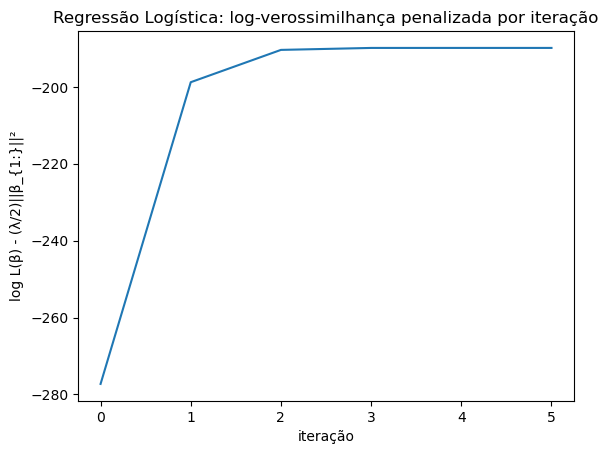

Acurácia (thr=0.5): 0.765


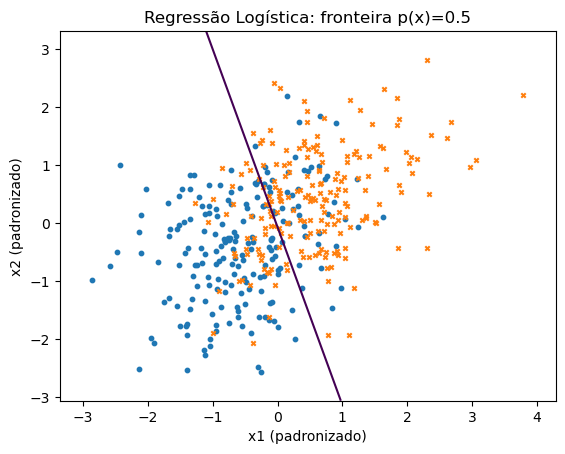

In [6]:

# Implementação NumPy da regressão logística (IRLS / Newton) com L2 
def sigmoid(t):
    return 1.0 / (1.0 + np.exp(-t))

def logistic_fit_newton(X, y, lam=0.0, max_iter=100, tol=1e-8, verbose=True):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float).reshape(-1)
    n, p = X.shape

    beta = np.zeros(p)  # inicialização
    R = np.eye(p); R[0,0] = 0.0  # não penalizar intercepto

    ll_hist = []

    for it in range(max_iter):
        eta = X @ beta
        pvec = sigmoid(eta)
        # log-verossimilhança penalizada (apenas para monitorar; sem constante)
        ll = np.sum(y*np.log(pvec + 1e-15) + (1-y)*np.log(1 - pvec + 1e-15)) - 0.5*lam*beta.T@R@beta
        ll_hist.append(ll)

        W = pvec*(1-pvec)
        # evitar zeros exatos
        W[W < 1e-12] = 1e-12
        WX = X * W[:, None]
        H = X.T @ WX + lam*R  # Hessiana "negativa" com sinal trocado para resolver +H*step = grad
        g = X.T @ (y - pvec) - lam*R@beta

        try:
            step = np.linalg.solve(H, g)
        except np.linalg.LinAlgError:
            # fallback para pseudo-inversa
            step = np.linalg.pinv(H) @ g

        beta_new = beta + step

        if verbose:
            print(f"it={it:03d}  ll={ll:.6f}  step_norm={np.linalg.norm(step):.3e}")
        if np.linalg.norm(step) < tol:
            beta = beta_new
            break
        beta = beta_new

    return beta, np.array(ll_hist)

def logistic_predict_proba(X, beta):
    return sigmoid(X @ beta)

def logistic_predict_label(X, beta, thr=0.5):
    return (logistic_predict_proba(X, beta) >= thr).astype(int)

# Demonstração em dados sintéticos 2D (com intercepto)
n = 400
mean0 = np.array([0.0, 0.0])
mean1 = np.array([1.5, 1.0])
cov = np.array([[1.0, 0.3],
                [0.3, 1.0]])

X0 = rng.multivariate_normal(mean0, cov, size=n//2)
X1 = rng.multivariate_normal(mean1, cov, size=n//2)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(n//2), np.ones(n//2)])

X_std, muX, sdX = standardize(X)
X_aug = add_intercept(X_std)

beta_hat, ll_hist = logistic_fit_newton(X_aug, y, lam=1e-2, max_iter=100, tol=1e-8, verbose=False)

print("beta_hat (intercepto, w1, w2) =", beta_hat)

# Curva de log-verossimilhança por iteração
plt.figure()
plt.plot(ll_hist)
plt.title("Regressão Logística: log-verossimilhança penalizada por iteração")
plt.xlabel("iteração")
plt.ylabel("log L(β) - (λ/2)||β_{1:}||²")
plt.show()

# Acurácia com limiar 0.5
yhat = logistic_predict_label(X_aug, beta_hat, thr=0.5)
acc = (yhat == y).mean()
print("Acurácia (thr=0.5):", acc)

# Fronteira de decisão em 2D
x1 = np.linspace(X_std[:,0].min()-0.5, X_std[:,0].max()+0.5, 200)
x2 = np.linspace(X_std[:,1].min()-0.5, X_std[:,1].max()+0.5, 200)
G1, G2 = np.meshgrid(x1, x2)
Z = logistic_predict_proba(add_intercept(np.c_[G1.ravel(), G2.ravel()]), beta_hat).reshape(G1.shape)

plt.figure()
plt.contour(G1, G2, Z, levels=[0.5])
plt.scatter(X_std[y==0,0], X_std[y==0,1], s=10)
plt.scatter(X_std[y==1,0], X_std[y==1,1], s=10, marker='x')
plt.title("Regressão Logística: fronteira p(x)=0.5")
plt.xlabel("x1 (padronizado)")
plt.ylabel("x2 (padronizado)")
plt.show()



<a id="sec9"></a>
## 9) Informação de Fisher e IC assintóticos (cálculo explícito)

A **Informação de Fisher** (amostral) em 1D é $I(\theta) = -\dfrac{d^2}{d\theta^2}\ell(\theta)$ avaliada no **valor verdadeiro**.  
A **observada** é $J(\theta) = -\ell''(\theta)$ no ponto estimado.

- **Bernoulli(p)**: $I(p) = \dfrac{n}{p(1-p)}$ $\Rightarrow$ $\mathrm{Var}(\hat p)\approx \dfrac{p(1-p)}{n}$.
- **Poisson(λ)**: $I(\lambda) = \dfrac{n}{\lambda}$ $\Rightarrow$ $\mathrm{Var}(\hat\lambda)\approx \dfrac{\lambda}{n}$.
- **Exponencial(λ)**: $I(\lambda) = \dfrac{n}{\lambda^2}$ $\Rightarrow$ $\mathrm{Var}(\hat\lambda)\approx \dfrac{\lambda^2}{n}$.
- **Normal(μ, σ²)**: matriz de Fisher é diagonal por blocos; em particular  
  $\mathrm{Var}(\hat\mu) \approx \dfrac{\sigma^2}{n}$ e $\mathrm{Var}(\hat{\sigma}^2) \approx \dfrac{2\sigma^4}{n}$ (assintoticamente).

Por aproximação normal (teorema do limite central para MLEs),
$$
\hat{\theta} \approx \mathcal{N}\Big(\theta,\, I(\theta)^{-1}\Big).
$$
Substituindo $\theta$ por $\hat{\theta}$, obtemos **IC assintóticos** de 95%:
$$
\hat{\theta} \pm 1.96 \sqrt{I(\hat{\theta})^{-1}}.
$$


In [7]:

# ICs assintóticos de 95% com Fisher observada/teórica

def ci_bernoulli(y, alpha=0.05):
    n = len(y); k = y.sum(); ph = k/n
    # var ~ p(1-p)/n
    var = ph*(1-ph)/n
    se = np.sqrt(var)
    z = 1.96  # approx 95%
    return ph - z*se, ph + z*se

def ci_poisson(x, alpha=0.05):
    n = len(x); lam_h = x.mean()
    var = lam_h / n
    se = np.sqrt(var)
    z = 1.96
    return lam_h - z*se, lam_h + z*se

def ci_exponential(x, alpha=0.05):
    n = len(x); lam_h = n/x.sum()
    # var ~ lam^2/n ; plug-in
    var = (lam_h**2) / n
    se = np.sqrt(var)
    z = 1.96
    return lam_h - z*se, lam_h + z*se

def ci_normal_mu(x, alpha=0.05):
    n = len(x); mu_h = x.mean()
    s2_h = np.mean((x - mu_h)**2)
    se = np.sqrt(s2_h/n)
    z = 1.96
    return mu_h - z*se, mu_h + z*se

# Demonstração rápida
y = rng.binomial(1, 0.4, size=80)
x_pois = rng.poisson(3.0, size=120)
x_exp = rng.exponential(1/2.0, size=150)
x_norm = rng.normal(5.0, 2.0, size=200)

print("IC Bernoulli(p):", ci_bernoulli(y))
print("IC Poisson(λ): ", ci_poisson(x_pois))
print("IC Exponencial(λ): ", ci_exponential(x_exp))
print("IC Normal(μ): ", ci_normal_mu(x_norm))


IC Bernoulli(p): (0.3166723142497727, 0.5333276857502273)
IC Poisson(λ):  (2.84827138473624, 3.485061948597093)
IC Exponencial(λ):  (1.8857369894294576, 2.604291142566003)
IC Normal(μ):  (4.751164512180101, 5.267821866042525)



<a id="sec10"></a>
## 10) Armadilhas comuns e observações práticas

1. **Soluções na fronteira** (ex.: Bernoulli com todos 0s ou todos 1s): o score não anula; compare valores da log-verossimilhança nos limites do domínio.
2. **Separação perfeita** na logística: sem penalização, os coeficientes podem divergir (\(\hat{\beta}\to\infty\)); use **regularização**.
3. **Escala** de features (logística, Poisson com regressão, etc.): padronize para boa condição numérica.
4. **Identificabilidade**: modelos superparametrizados podem não ter MLE única.
5. **Multimodalidade**: verossimilhança pode ter múltiplos máximos locais; inicializações diferentes podem levar a soluções diferentes (mais comum em modelos complexos).
6. **Aproximações assintóticas**: para amostras pequenas, ICs baseados em Fisher podem ser ruins; prefira métodos exatos (Clopper–Pearson para Bernoulli/binomial, por ex.) ou *bootstrap*.
